In [1]:
import gymnasium as gym
from gym import spaces
import numpy as np
import torch
import torch.nn as nn
import envelope
import matplotlib.pyplot as plt
import gym_examples

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Fs = 10
N = 500
trans_info = [[{'coeff': 1.0, 'amps': 5 * np.array([-0.0154, -0.011, -0.005414]), 'freqs': [6.48e-3, 5.622e-3, 3.7e-3]},
               {'coeff': 0.01, 'amps': 5 * np.array([0.01237, -0.005816, -0.03928]), 'freqs': [0.01758, 0.005925, 0.002652]}],
              [{'coeff': -0.01, 'amps': 5 * np.array([-0.01568, -0.01486, -0.0064]), 'freqs': [0.00737, 0.0072, -0.0039]},
               {'coeff': 1.0, 'amps': 5 * np.array([-0.0154, -0.011, -0.005414]), 'freqs': [6.48e-3, 5.622e-3, 3.7e-3]}]]
A = envelope.flattop(t0=5.,len=10.,amp=1.,w=1.)
B = envelope.flattop(t0=15.,len=30.,amp=0.8,w=1.)
time = np.arange(N) / Fs  # (ns) 
freq = np.fft.fftfreq(N, d=1/Fs) # (GHz)
initial_state = np.column_stack((A(time).astype('float32'),B(time).astype('float32'))) 

<ipython-input-2-ed01e9aa3c47>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  initial_state = np.column_stack((A(time).astype('float32'),B(time).astype('float32')))


In [3]:
env = gym.make(id='gym_examples/Quantum', Fs=Fs, N=N, initial_state=initial_state,trans_info=trans_info)

In [4]:
print(env.action_space)
print(env.observation_space)

Box(-1.0, 1.0, (500, 2), float32)
Box(-inf, inf, (500, 2), float32)


In [5]:
import core

In [6]:
# 이 ac가 actor_critic 인데

ac = core.MLPActorCritic(env.observation_space, env.action_space, hidden_sizes=[256,256])

In [7]:
test_action = env.action_space.sample()

In [8]:
test_action.dtype

dtype('float32')

In [9]:
env.reset()
s_,r,terminated,truncated,info = env.step(test_action)

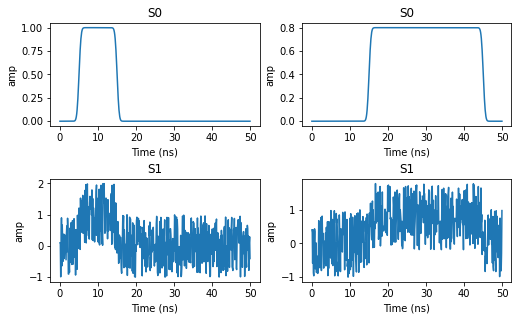

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18/2.54, 11/2.54), constrained_layout=True)

axes[0, 0].plot(time,initial_state[:,0])
axes[0, 0].set_xlabel('Time (ns)')
axes[0, 0].set_ylabel('amp')
axes[0, 0].set_title('S0')

axes[0, 1].plot(time, initial_state[:,1])
axes[0, 1].set_xlabel('Time (ns)')
axes[0, 1].set_ylabel('amp')
axes[0, 1].set_title('S0')

axes[1, 0].plot(time, s_[:,0])
axes[1, 0].set_xlabel('Time (ns)')
axes[1, 0].set_ylabel('amp')
axes[1, 0].set_title('S1')

axes[1, 1].plot(time, s_[:,1])
axes[1, 1].set_xlabel('Time (ns)')
axes[1, 1].set_ylabel('amp')
axes[1, 1].set_title('S1')

plt.show()

In [12]:
si=test_action+initial_state

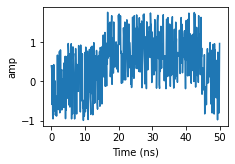

In [13]:
fig, ax = plt.subplots(figsize=(8/2.54, 5.5/2.54), constrained_layout=True)
ax.plot(time, si[:,1])
ax.set_xlabel('Time (ns)')
ax.set_ylabel('amp')
plt.show()

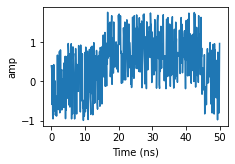

In [14]:
fig, ax = plt.subplots(figsize=(8/2.54, 5.5/2.54), constrained_layout=True)
ax.plot(time, s_[:,1])
ax.set_xlabel('Time (ns)')
ax.set_ylabel('amp')
plt.show()

# reset()이랑 step() 다 고침 -20231113